### The purpose of this notebook is to explore the Ames Housing Dataset and learn how to critically think through the data to gather insight and make use of those insights rather than just working through the dataset to complete a project for a portfolio.

### The Ames Housing Dataset, a staple in machine learning circles, is more than just numbers on a spreadsheet. It holds the stories of homes and families, offering valuable insights into the socio-economic landscape of a Midwestern American city. Let's peel back the layers of this rich dataset and discover its unique characteristics.

### Key Features:

#### Comprehensive: Boasting nearly 80 features, it paints a detailed picture of each property, from structural aspects like square footage and number of bedrooms to neighborhood attributes and even market factors like year built and sale price.

#### Rich Context: This data isn't isolated – geographic information allows spatial analysis, while temporal aspects like sale date enable examining market trends over time.

#### Real-World Relevance: The data reflects actual sales in a specific context, making it valuable for testing and refining real estate prediction models.

#### Challenges and Opportunities: The inherent imbalance between house prices and the presence of outliers pose challenges, but also opportunities for robust model development and outlier detection techniques.

### Unique Insights:

#### Neighborhood Impact: Analyze how factors like proximity to amenities, school quality, and crime rates influence property values.

#### Market Trends: Uncover time-based patterns in pricing, construction styles, and buyer preferences.

#### Hidden Relationships: Explore subtle correlations between seemingly unrelated features using advanced statistical techniques.

#### Predictive Power: Train and evaluate machine learning models to predict future sale prices, assess loan risks, and inform strategic investment decisions.

### The Ames Housing Dataset isn't just about predicting prices; it offers a glimpse into the human stories behind the bricks and mortar. By understanding the factors that influence housing values, we can inform policies that promote equitable access to safe and affordable housing, making it a valuable tool for urban planning and community development. Let's dive in.

In [248]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import numpy as np

In [249]:
df=pd.read_csv("D:\AmesHousing.csv")
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [250]:
df.tail(10)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2920,2921,923228310,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,71000
2921,2922,923229110,90,RL,55.0,12640,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,150900
2922,2923,923230040,90,RL,63.0,9297,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,7,2006,WD,Family,188000
2923,2924,923250060,20,RL,80.0,17400,Pave,NaN,Reg,Low,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,160000
2924,2925,923251180,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,131000
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000
2929,2930,924151050,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,188000


In [251]:
df.shape

(2930, 82)

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [253]:
# Get a more detailed summary of null values with percentages
null_info = df.isnull().sum() / len(df) * 100
print(null_info[null_info > 0])  # Display only columns with nulls

Lot Frontage      16.723549
Alley             93.242321
Mas Vnr Type       0.784983
Mas Vnr Area       0.784983
Bsmt Qual          2.730375
Bsmt Cond          2.730375
Bsmt Exposure      2.832765
BsmtFin Type 1     2.730375
BsmtFin SF 1       0.034130
BsmtFin Type 2     2.764505
BsmtFin SF 2       0.034130
Bsmt Unf SF        0.034130
Total Bsmt SF      0.034130
Electrical         0.034130
Bsmt Full Bath     0.068259
Bsmt Half Bath     0.068259
Fireplace Qu      48.532423
Garage Type        5.358362
Garage Yr Blt      5.426621
Garage Finish      5.426621
Garage Cars        0.034130
Garage Area        0.034130
Garage Qual        5.426621
Garage Cond        5.426621
Pool QC           99.556314
Fence             80.477816
Misc Feature      96.382253
dtype: float64


### Since there are missing data in 48% to 99% in columns, there is no use for encoding with mean or median,so it is best to drop those columns. We also see that the remaining missing data involve multiple columns within 1 row.

In [254]:
columns_to_drop = ["Alley", "Fireplace Qu", "Pool QC", "Fence", "Misc Feature", "PID", "Order"] 
# dropping Order and PID columns since they do not contribute anything
df.drop(columns_to_drop, inplace=True, axis=1)
df.shape

(2930, 75)

### Let's take a look at the boxplots of the numerical columns. 

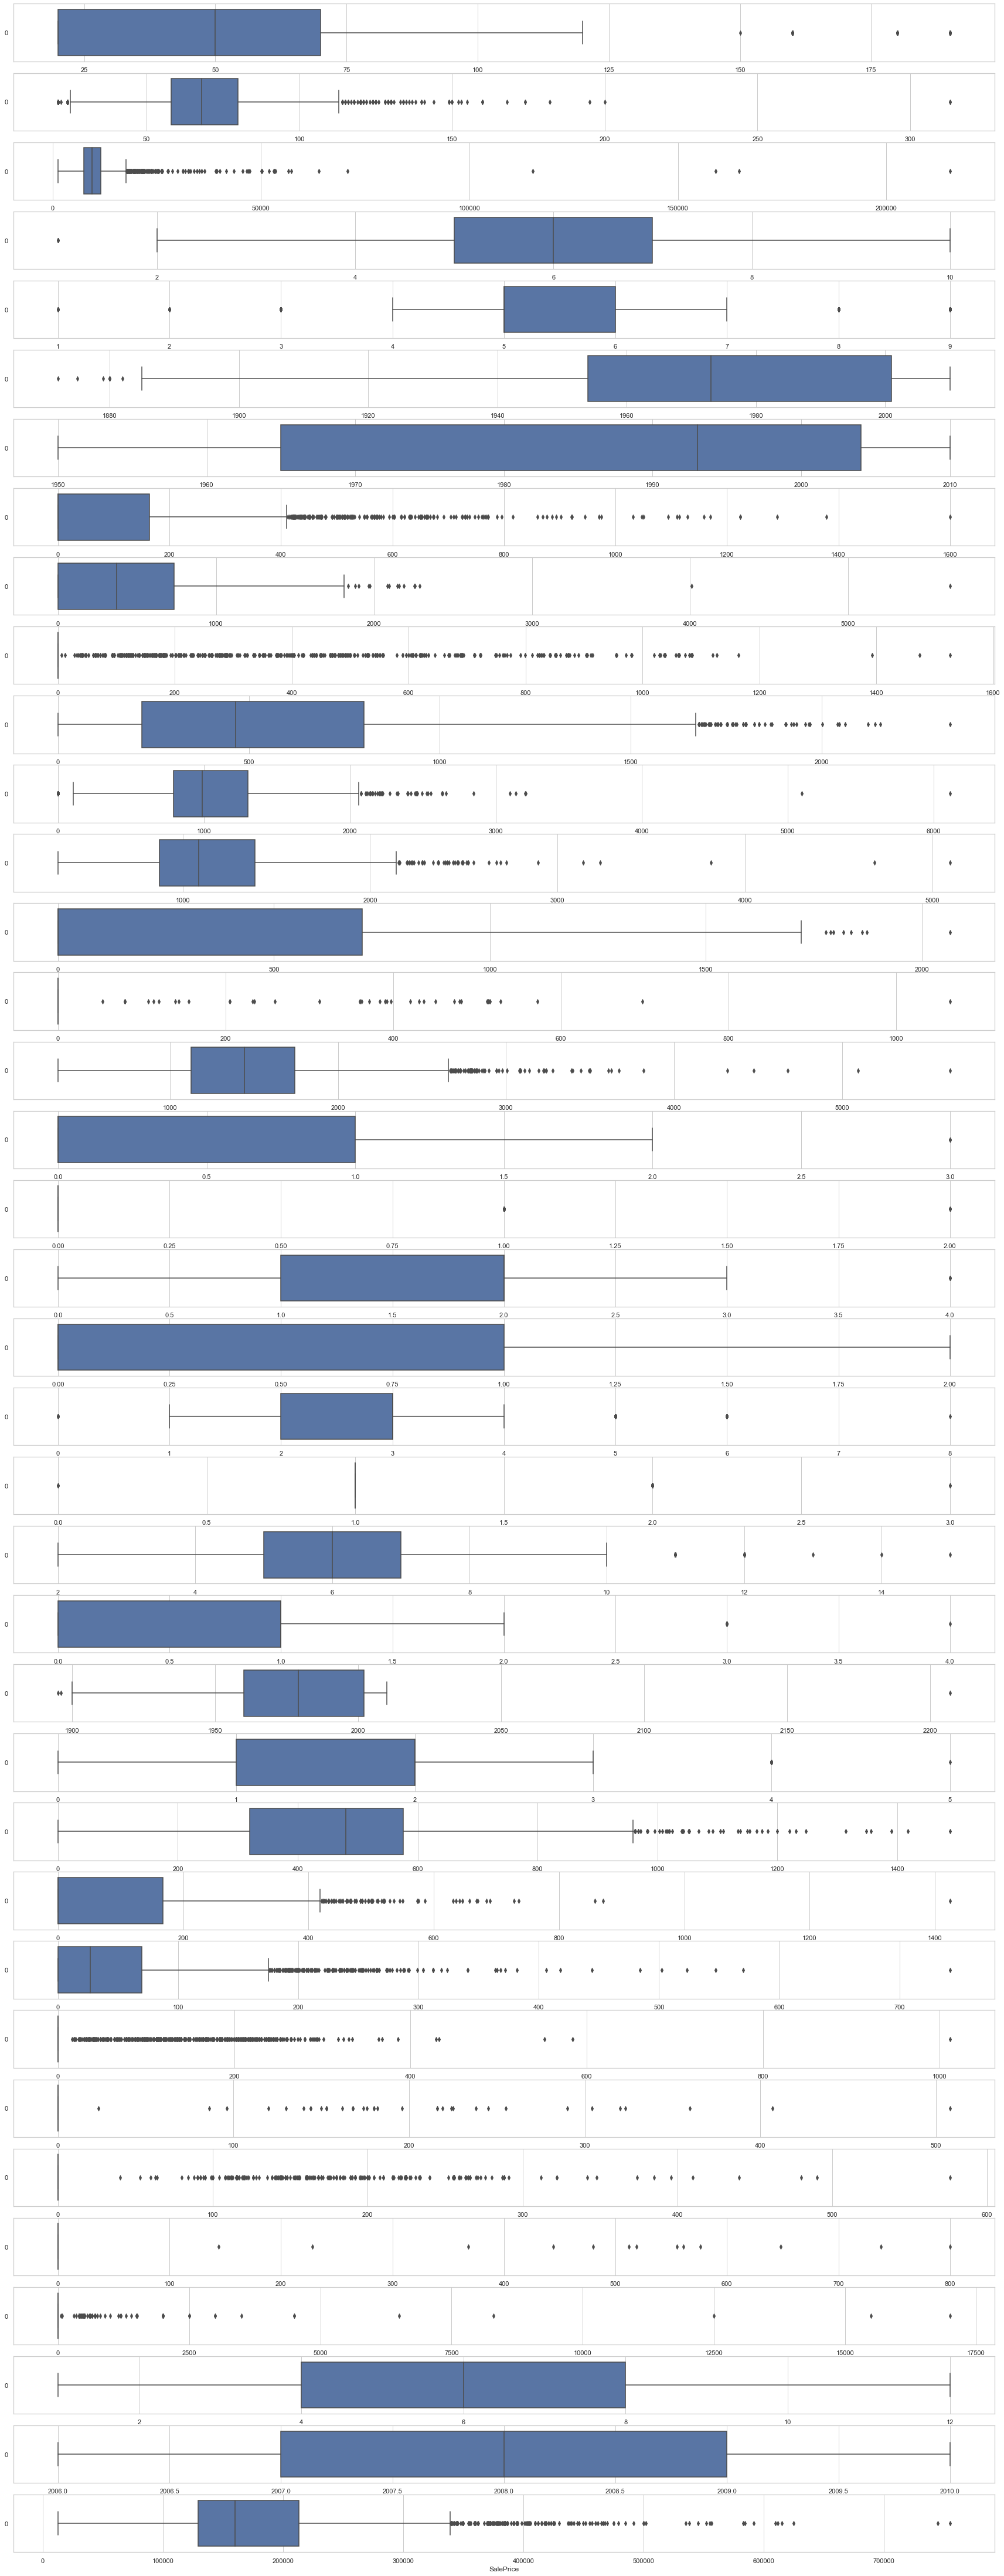

In [255]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=["number"]).columns
fig,ax = plt.subplots(len(numerical_cols), 1, figsize = (30,80))
for index in range(len(numerical_cols)):
  sns.boxplot(data=df[numerical_cols[index]], orient="h", ax = ax[index])   
  ax[index].set_xlabel(numerical_cols[index]) 
 
sns.set_theme(style="whitegrid")  
  

### We see that most values for the columns are low and we will need Scaling later on. Since We will encode Lot Frontage column, lets try to understand it better by making a histogram

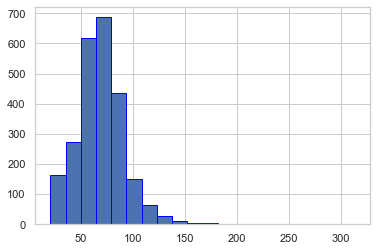

In [256]:
plt.hist(df["Lot Frontage"], bins=20, edgecolor="blue") 
plt.grid(True)

plt.show()

### Distribution looks slightly skewed to the right.

In [257]:
print(df["Lot Frontage"])

0       141.0
1        80.0
2        81.0
3        93.0
4        74.0
        ...  
2925     37.0
2926      NaN
2927     62.0
2928     77.0
2929     74.0
Name: Lot Frontage, Length: 2930, dtype: float64


### We will encode the "Lot Frontage" column most likey with either the mean or median, once we see the distribution and outliers which we will look at next.

In [258]:
df.describe()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,2929.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,49.722431,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,169.168476,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [259]:
df["Lot Frontage"].describe()

count    2440.000000
mean       69.224590
std        23.365335
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: Lot Frontage, dtype: float64

In [260]:
median_value = df["Lot Frontage"].median() 
print(median_value)

68.0


In [261]:
df2 = df.dropna() 

In [262]:
df2["Lot Frontage"].describe() # lost 222 observation since they were NULL

count    2218.000000
mean       69.626240
std        23.342377
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: Lot Frontage, dtype: float64

In [263]:
df2.head(10)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,189900
5,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2010,WD,Normal,195500
6,120,RL,41.0,4920,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,170,0,0,0,0,4,2010,WD,Normal,213500
7,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,0,0,144,0,0,1,2010,WD,Normal,191500
8,120,RL,39.0,5389,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2010,WD,Normal,236500
9,60,RL,60.0,7500,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2010,WD,Normal,189000


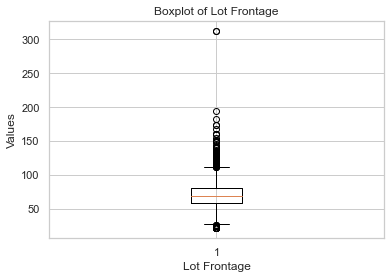

In [264]:
# Creating the boxplot for the "Lot Frontage" column,in order to check for distribution and outliers.

column = "Lot Frontage"


plt.boxplot(df2[column])


plt.title("Boxplot of Lot Frontage")
plt.xlabel(column)
plt.ylabel("Values")

plt.show()

### We can see there are more extreme values above the upper boundry than the lower boundry. Now we will  isolate the outliers. 

In [265]:
column_name = "Lot Frontage"  
# Calculate IQR (Interquartile Range)
Q1 = df2[column_name].quantile(0.25)
Q3 = df2[column_name].quantile(0.75)
IQR = Q3 - Q1

# Defining outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifing outliers
outliers = df2[~((df2[column_name] >= lower_bound) & (df2[column_name] <= upper_bound))]

# Get a list of outlier values
outlier_values = outliers[column_name].tolist()

# Print the outlier values
print(outlier_values)

[141.0, 152.0, 140.0, 26.0, 21.0, 21.0, 21.0, 24.0, 24.0, 24.0, 25.0, 24.0, 24.0, 24.0, 120.0, 137.0, 119.0, 124.0, 129.0, 21.0, 124.0, 21.0, 24.0, 21.0, 21.0, 21.0, 21.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 129.0, 117.0, 129.0, 149.0, 122.0, 174.0, 112.0, 24.0, 115.0, 128.0, 120.0, 120.0, 121.0, 144.0, 122.0, 112.0, 130.0, 24.0, 24.0, 24.0, 24.0, 150.0, 113.0, 130.0, 125.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 24.0, 24.0, 114.0, 130.0, 112.0, 135.0, 136.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 22.0, 313.0, 115.0, 124.0, 120.0, 313.0, 24.0, 24.0, 120.0, 150.0, 21.0, 21.0, 160.0, 195.0, 128.0, 26.0, 21.0, 21.0, 21.0, 24.0, 24.0, 24.0, 24.0, 118.0, 134.0, 182.0, 160.0, 116.0, 24.0, 24.0, 24.0, 130.0, 113.0, 120.0, 120.0, 114.0, 116.0, 155.0, 120.0, 128.0, 130.0, 24.0, 115.0, 149.0, 21.0, 21.0, 21.0, 124.0, 134.0, 168.0, 26.0, 24.0, 24.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 24.0, 24.0, 129.0, 120.0, 120.0, 121.0, 131.0, 118.0, 114.0, 121.0, 24.

In [266]:
print(Q1)
print(Q3)

59.0
80.0


In [267]:
# Drop the outliers
df2.drop(outlier_values)

KeyError: '[140.  24.  24.  24.  24.  24.  24. 119. 129.  24.  24.  24.  24.  24.\n  24.  24.  24.  24.  24. 129. 129. 122. 112.  24. 144. 122. 112. 130.\n  24.  24.  24.  24. 113. 130. 125.  24.  24. 130. 112. 136.  24.  24.\n  24.  24.  24.  24.  22. 313. 313.  24.  24.  24.  24.  24.  24. 118.\n  24.  24.  24. 130. 113. 130.  24.  24.  24.  24.  24. 129. 118.  24.\n  24. 125. 118. 118.  24.  24.  24.  24. 140.] not found in axis'

In [268]:
# Check to see if we sucessfully dropped out.
print(outlier_values)

[141.0, 152.0, 140.0, 26.0, 21.0, 21.0, 21.0, 24.0, 24.0, 24.0, 25.0, 24.0, 24.0, 24.0, 120.0, 137.0, 119.0, 124.0, 129.0, 21.0, 124.0, 21.0, 24.0, 21.0, 21.0, 21.0, 21.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 129.0, 117.0, 129.0, 149.0, 122.0, 174.0, 112.0, 24.0, 115.0, 128.0, 120.0, 120.0, 121.0, 144.0, 122.0, 112.0, 130.0, 24.0, 24.0, 24.0, 24.0, 150.0, 113.0, 130.0, 125.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 24.0, 24.0, 114.0, 130.0, 112.0, 135.0, 136.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 22.0, 313.0, 115.0, 124.0, 120.0, 313.0, 24.0, 24.0, 120.0, 150.0, 21.0, 21.0, 160.0, 195.0, 128.0, 26.0, 21.0, 21.0, 21.0, 24.0, 24.0, 24.0, 24.0, 118.0, 134.0, 182.0, 160.0, 116.0, 24.0, 24.0, 24.0, 130.0, 113.0, 120.0, 120.0, 114.0, 116.0, 155.0, 120.0, 128.0, 130.0, 24.0, 115.0, 149.0, 21.0, 21.0, 21.0, 124.0, 134.0, 168.0, 26.0, 24.0, 24.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 24.0, 24.0, 129.0, 120.0, 120.0, 121.0, 131.0, 118.0, 114.0, 121.0, 24.

### Upon further investigation, the remaining null values in the other columns were within the same observations, therefor we
### simply keep the df2 dataset with the NULL values already dropped.

In [270]:
df = df2
df.isnull().sum()

MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
Street            0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 75, dtype: int64

### Now we will start encoding categorical variables.

In [272]:
# Selected categorical columns by using object datatype
categorical_columns = df.select_dtypes(include=['object']) 

for col in categorical_columns:
    print(f"Unique values in column '{col}':")
    print(df[col].value_counts())
    print("-------------------------------------")

Unique values in column 'MS Zoning':
RL         1708
RM          365
FV          112
RH           18
C (all)      15
Name: MS Zoning, dtype: int64
-------------------------------------
Unique values in column 'Street':
Pave    2211
Grvl       7
Name: Street, dtype: int64
-------------------------------------
Unique values in column 'Lot Shape':
Reg    1536
IR1     626
IR2      46
IR3      10
Name: Lot Shape, dtype: int64
-------------------------------------
Unique values in column 'Land Contour':
Lvl    2002
HLS     104
Bnk      84
Low      28
Name: Land Contour, dtype: int64
-------------------------------------
Unique values in column 'Utilities':
AllPub    2218
Name: Utilities, dtype: int64
-------------------------------------
Unique values in column 'Lot Config':
Inside     1688
Corner      375
CulDSac      89
FR2          57
FR3           9
Name: Lot Config, dtype: int64
-------------------------------------
Unique values in column 'Land Slope':
Gtl    2118
Mod      94
Sev      

### We see that we have some encoding to do on the categorical "object" datatypes since there are 5+ responses for many with some 
### having the vast majority of observations in the first or top 3 columns. 

In [274]:
df["Central Air"].head(5) ### How did we get 100% missing values for central values if we dropped the rest of the nulls

0    Y
1    Y
2    Y
3    Y
4    Y
Name: Central Air, dtype: object

In [275]:
df_encoded = df.copy()

In [276]:
# Select the Central Air column to encode
column_to_encode = "Central Air" 

# Binary encoding using a mapping for clarity
df_encoded[column_to_encode] = df_encoded[column_to_encode].map({"Y": 1, "N": 0})

# Print the encoded column
print(df_encoded[column_to_encode])

0       1
1       1
2       1
3       1
4       1
       ..
2923    1
2924    1
2925    1
2928    1
2929    1
Name: Central Air, Length: 2218, dtype: int64


In [277]:
# Now we are using frequency encoding for the categorical columns.

def frequency_encoding(df, columns):
    """Applies frequency encoding to specified columns in a DataFrame."""

    for col in columns:
        freq_dict = df[col].value_counts(normalize=True).to_dict()  # Calculate normalized frequencies
        df[col] = df[col].map(freq_dict)  # Replace values with frequencies

# Select columns to encode
columns_to_encode = categorical_columns # Replace with your desired columns

# Apply frequency encoding
frequency_encoding(df_encoded, columns_to_encode)

# Print the encoded DataFrame
print(df_encoded)

      MS SubClass  MS Zoning  Lot Frontage  Lot Area    Street  Lot Shape  \
0              20   0.770063         141.0     31770  0.996844   0.282236   
1              20   0.008115          80.0     11622  0.996844   0.692516   
2              20   0.770063          81.0     14267  0.996844   0.282236   
3              20   0.770063          93.0     11160  0.996844   0.692516   
4              60   0.770063          74.0     13830  0.996844   0.282236   
...           ...        ...           ...       ...       ...        ...   
2923           20   0.770063          80.0     17400  0.996844   0.692516   
2924           20   0.770063         160.0     20000  0.996844   0.692516   
2925           80   0.770063          37.0      7937  0.996844   0.282236   
2928           20   0.770063          77.0     10010  0.996844   0.692516   
2929           60   0.770063          74.0      9627  0.996844   0.692516   

      Land Contour  Utilities  Lot Config  Land Slope  ...  Enclosed Porch 

In [278]:
df_encoded.shape      

(2218, 75)

### Now we will look at distributions of data and relationships.

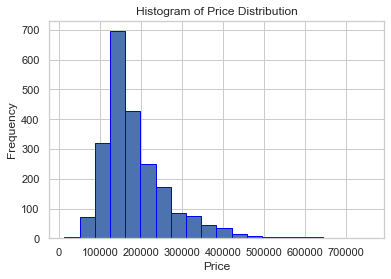

In [282]:
# Create the histogram for SalePrice column, which would be the target if we were performing regression on this notebook.
plt.hist(df["SalePrice"], bins=20, edgecolor="blue")  # Adjust bins as needed

# Customize the plot
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Histogram of Price Distribution")
plt.grid(True)

# Show the plot
plt.show()

### We see a Right skewness on the data for housing price, might perform log transformation to use in future notebooks
### Now lets see relationships between features

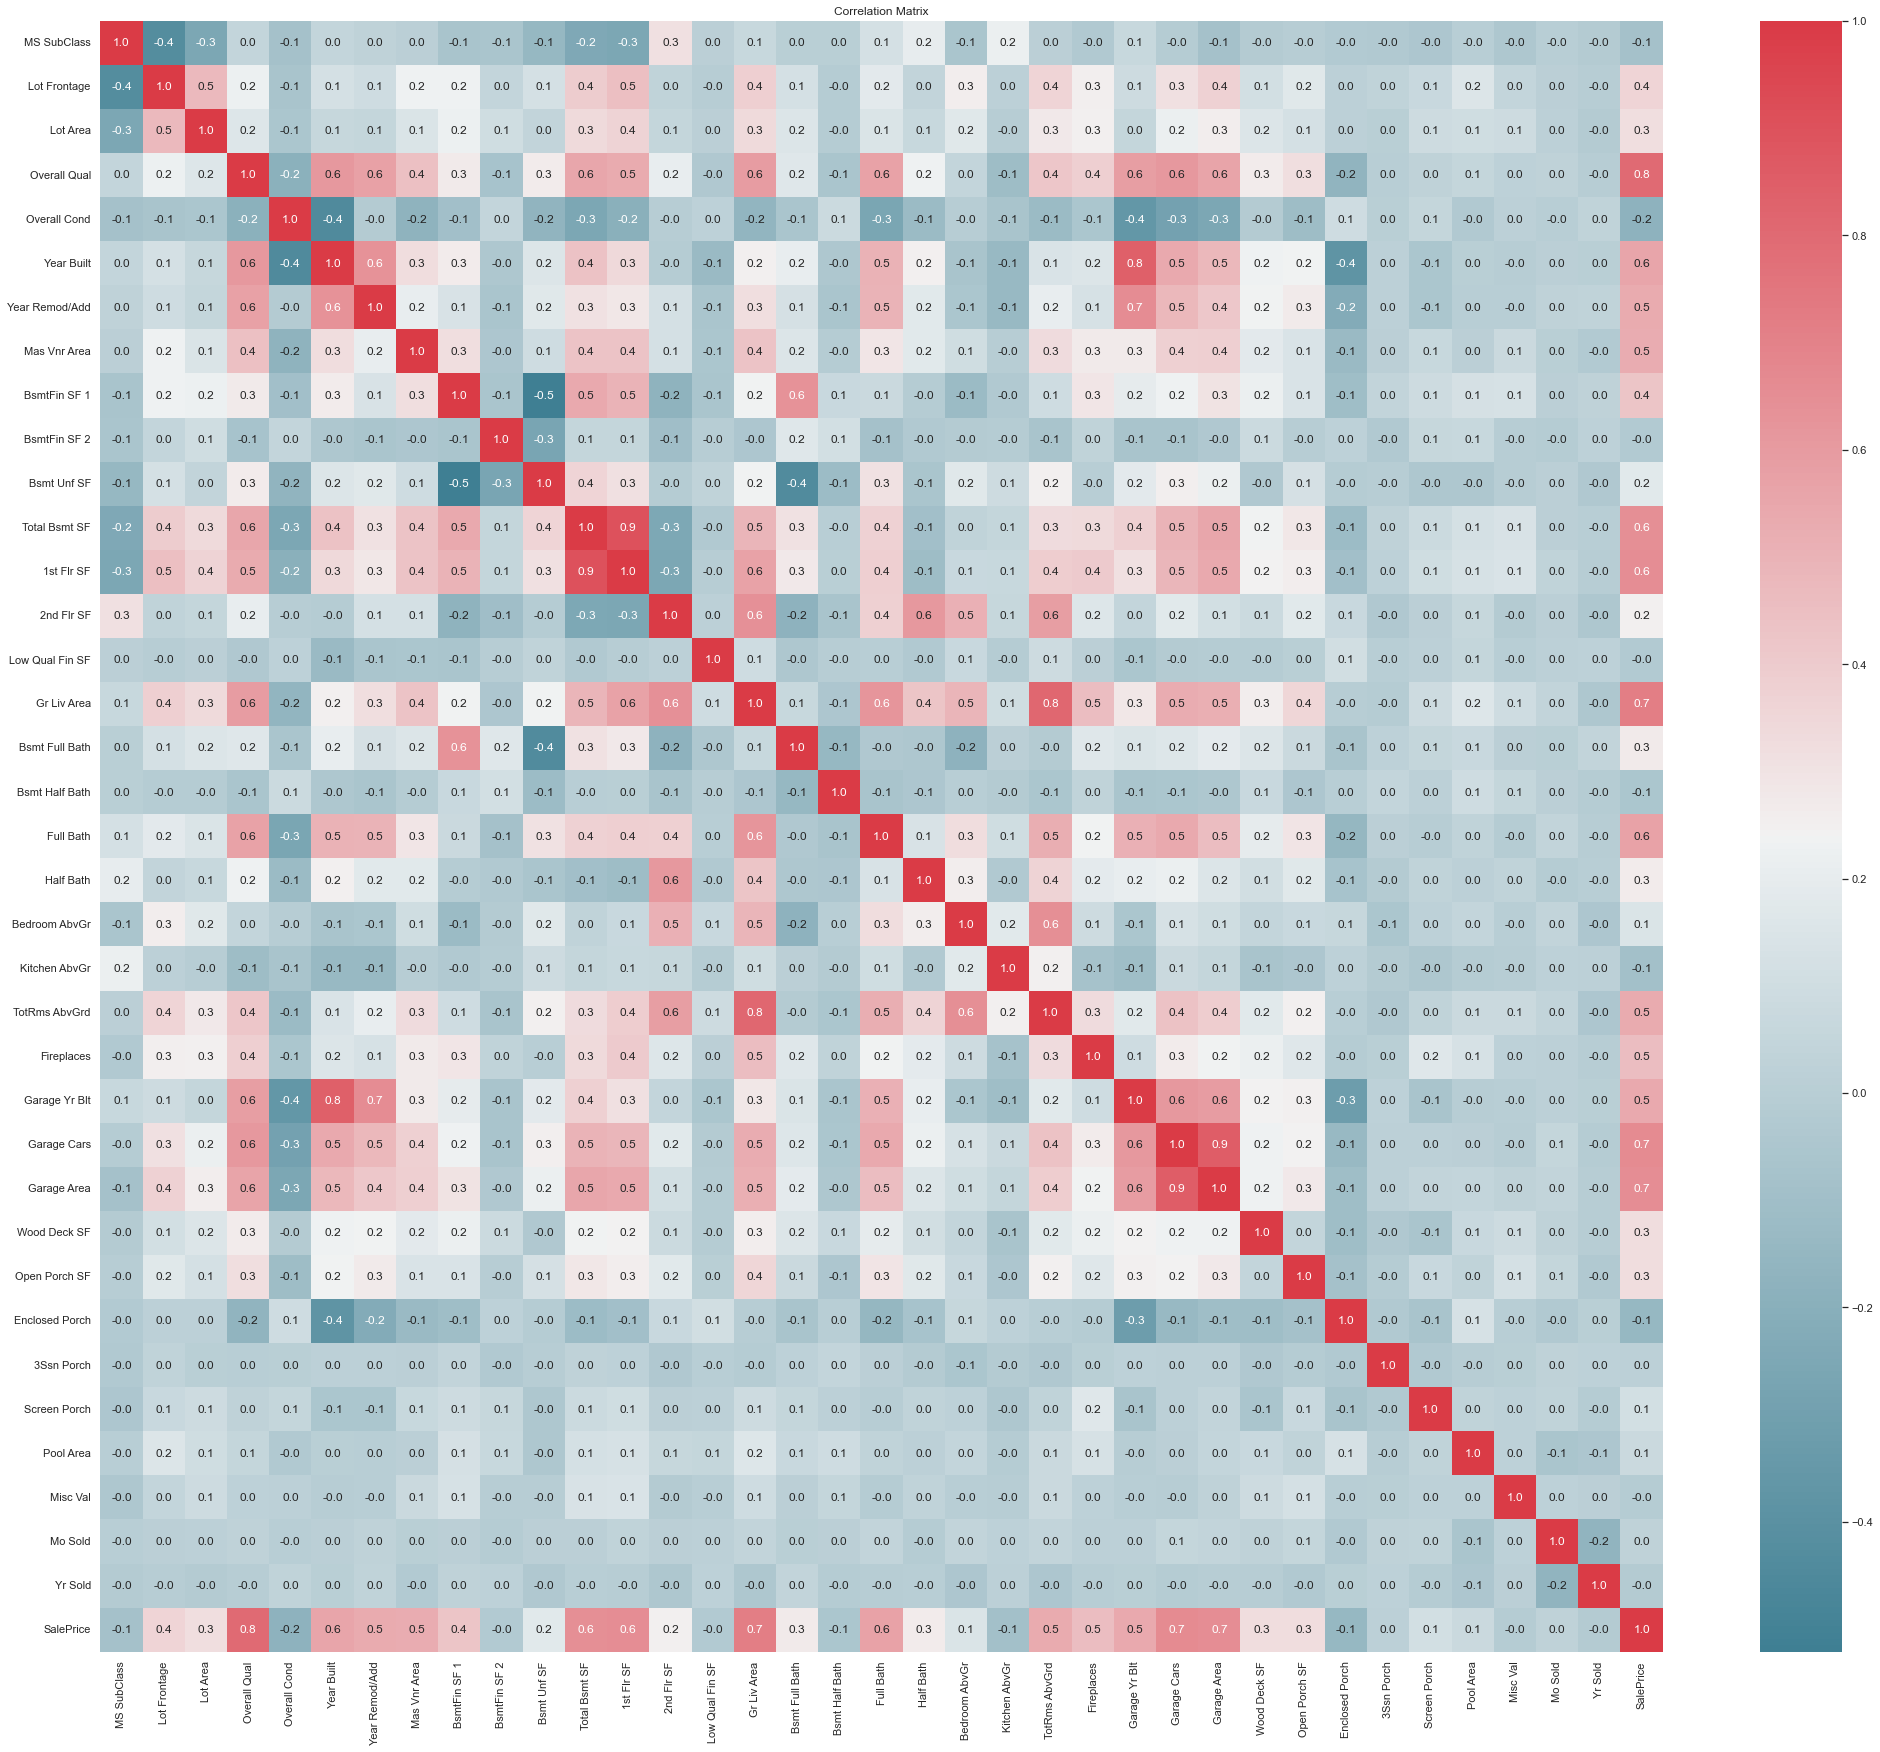

In [284]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Generate a heatmap
plt.figure(figsize=(35, 30)) 
sns.heatmap(corr_matrix, cmap=cmap, annot=True, fmt=".1f")
plt.title("Correlation Matrix")
plt.show()

### Overall Quality had a positive relationship with sales price
### The greater the living room area was, the higher the sales price was. The area of the garage, therefor the amount of cars the garage could hold was highly coorelated with house price.
### In addition, Garage year built column has high relationship with the year the house was built, and single floor homes tend to have a basement.
### Negative coorelations include, MS Subclass and Building type; but the most surprising is Exterior Quality having a negative relationship with sales price

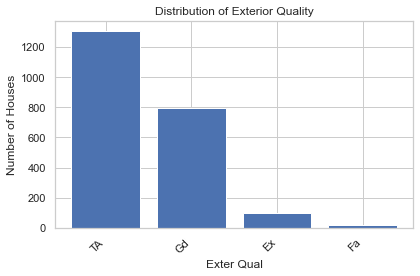

In [286]:
# Count the occurrences of each value in 'Exter Qual'
counts = df["Exter Qual"].value_counts()

# Create a bar chart
plt.bar(counts.index, counts.values)
plt.xlabel("Exter Qual")
plt.ylabel("Number of Houses")
plt.title("Distribution of Exterior Quality")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping
#plt.show()
#print(counts.index)

### Exterior Quality from left to right improves. You can see that most of the houses for sale are not in perfect shape on the outside with majority of houses on the left side of the graph.

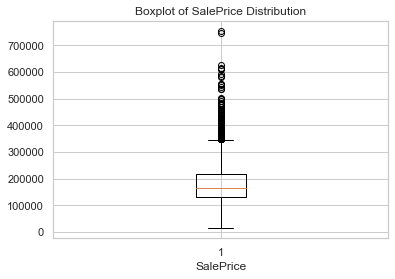

In [289]:
# Box plot for SalePrice column
# Create the boxplot
plt.boxplot(df["SalePrice"])

# Customize the plot
plt.xlabel("SalePrice")
plt.title("Boxplot of SalePrice Distribution")
plt.grid(True)

# Show the plot
plt.show()

### We see many outliers on the higher end of the SalePrice starting from $350k to $790k. Half of the houses values are between 120k and 215k, q1-q3

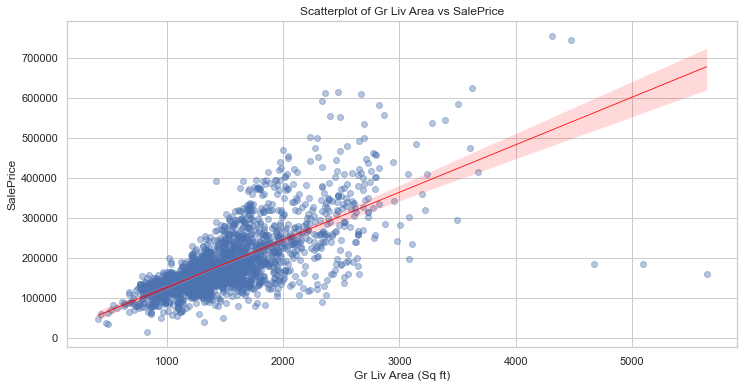

In [292]:
plt.figure(figsize=(12,6))
graph = sns.regplot(data=df, x='Gr Liv Area', y='SalePrice', 
                scatter_kws={'alpha': 0.4}, 
                line_kws={'color': 'red','linewidth':0.8})
plt.xlabel(xlabel='Gr Liv Area (Sq ft)')
plt.ylabel(ylabel='SalePrice')
plt.title(label='Scatterplot of Gr Liv Area vs SalePrice')
plt.show()

### We see a positive coorelationship between larger Living area and SalesPrice at first then as Living are increases from 2000 Sq ft the model has a harder time predicting the sales price of the home.

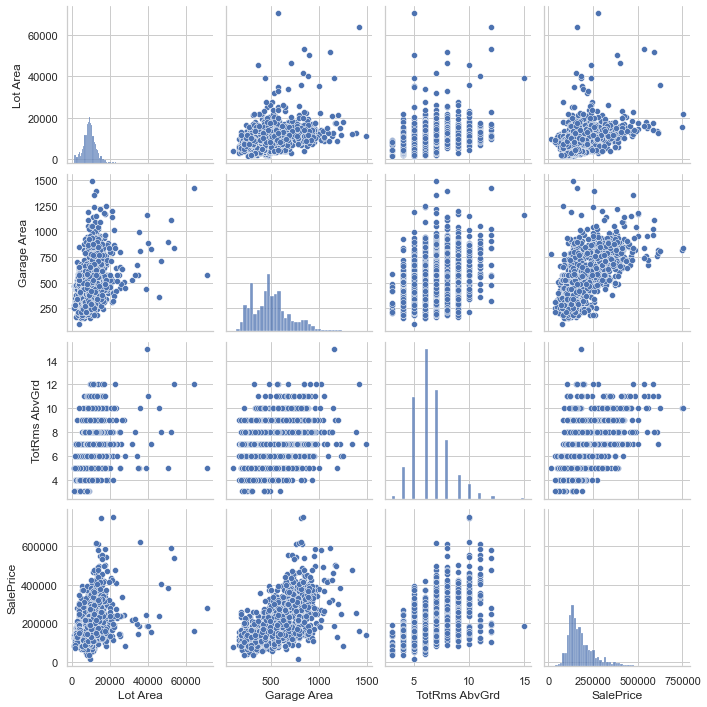

In [295]:
pair_plot_columns = ['Lot Area', 'Garage Area', 'TotRms AbvGrd', 'SalePrice']

# Outlier with high lot area messing up visualizations, remove it
outlier_row = df['Lot Area'].argmax()
df_viz = df.drop(df.index[outlier_row])

sns.pairplot(df_viz[pair_plot_columns])

### Removing the outlier made a huge difference in the interpretbility of the graphs. There is clearly a relationship between Garage Area and SalesPrice, mentioned earlier and Garage Area and Lot area, which was not visible with the outlier present.

In [297]:
pd.crosstab(df['House Style'], df['Bldg Type'], normalize='index')

Bldg Type,1Fam,2fmCon,Duplex,Twnhs,TwnhsE
House Style,,,,,
1.5Fin,0.948207,0.051793,0.000000,0.000000,0.000000
1.5Unf,0.928571,0.071429,0.000000,0.000000,0.000000
1Story,0.833185,0.012489,0.018733,0.016057,0.119536
2.5Fin,1.000000,0.000000,0.000000,0.000000,0.000000
2.5Unf,0.823529,0.117647,0.058824,0.000000,0.000000
2Story,0.812874,0.011976,0.016467,0.091317,0.067365
SFoyer,0.560000,0.020000,0.240000,0.040000,0.140000
SLvl,0.923077,0.010989,0.010989,0.032967,0.021978


In [298]:
cont = pd.crosstab(df['House Style'], df['Bldg Type'])

### We see that most houses for sale are single family homes.

In [300]:
cont

Bldg Type,1Fam,2fmCon,Duplex,Twnhs,TwnhsE
House Style,,,,,
1.5Fin,238,13,0,0,0
1.5Unf,13,1,0,0,0
1Story,934,14,21,18,134
2.5Fin,6,0,0,0,0
2.5Unf,14,2,1,0,0
2Story,543,8,11,61,45
SFoyer,28,1,12,2,7
SLvl,84,1,1,3,2


In [301]:
# Chi Squared
chi2, p, degf, exp = stats.chi2_contingency(cont)
p

3.454448847343328e-45

### This shows there is indeed a relationship between SalesPrice and Building Type. You can tell by the very low P value.

In [303]:
# T Test
df_cntair_y = df[df['Central Air'] == 'Y']
df_cntair_n = df[df['Central Air'] == 'N']
stats.ttest_ind(df_cntair_y['SalePrice'], df_cntair_n['SalePrice'])

Ttest_indResult(statistic=10.263272424275579, pvalue=3.552208731287613e-24)

### The low P value indicates that there is a relationship.

{'whiskers': [<matplotlib.lines.Line2D at 0x20d299aea90>,
 'caps': [<matplotlib.lines.Line2D at 0x20d299b81f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20d299ae700>,
 'medians': [<matplotlib.lines.Line2D at 0x20d299b8910>,
 'fliers': [<matplotlib.lines.Line2D at 0x20d299b8ca0>,
 'means': []}

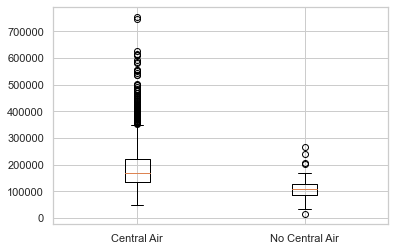

In [305]:
plt.boxplot([df_cntair_y['SalePrice'], df_cntair_n['SalePrice']], labels=['Central Air', 'No Central Air'])

### Houses with Central Air cost more than houses without central air.

In [307]:
# ANOVA Test
# Categorical var: Neighborhood
# Continuous var: Sale Price
groups = df['SalePrice'].groupby(df['Neighborhood'])
neighborhoods, prices = zip(*groups)

stats.f_oneway(*prices)

F_onewayResult(statistic=119.70404339167743, pvalue=0.0)

In [308]:
# The extremly close to 0 P value indicates a definate relationship.

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

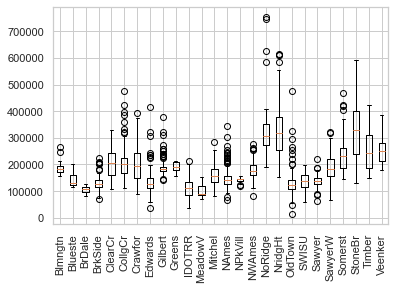

In [309]:
plt.boxplot(prices, labels=neighborhoods)
plt.xticks(rotation=90)

### Lets see this graph in descending order by median.

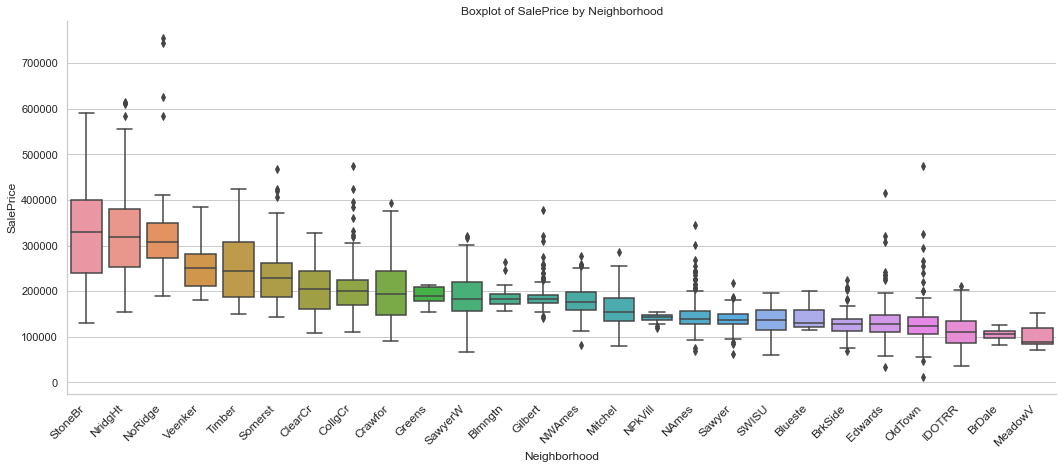

In [311]:
# Need to build collection of neighhoods sorted by decreasing median price
median_price_by_hood = df.groupby('Neighborhood') \
                                       .agg(Sale_Price=('SalePrice',np.median)) \
                                       .sort_values('Sale_Price', ascending=False)

sns.set_style("whitegrid")
g = sns.catplot(x='Neighborhood', 
                y='SalePrice',
                data=df,
                order = list(median_price_by_hood.index), 
                kind='box', height=6, aspect=2.5)
g.set_xticklabels(rotation=45, ha='right', size=12)
plt.title(label='Boxplot of SalePrice by Neighborhood')
plt.show()

In [ ]:
# We see that the most expensive neighborhoods median house price is $300,000 and the least expensive ###neighborhood price is around $100,000.

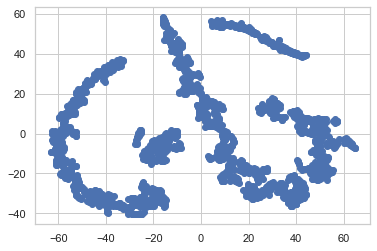

In [314]:
df_numerical = df.select_dtypes(include='number')
# There is an outlier, same one from last time
df_numerical_nooutlier = df_numerical.drop(df_numerical.index[outlier_row])
tsne = TSNE()
df_num_tsned = tsne.fit_transform(df_numerical_nooutlier)
plt.scatter(*df_num_tsned.T)

### Two glomerative clustering with singular linkage.Two groups have intersections together, not seperatable.

In [315]:
df_num_tsned 

array([[-52.40219  , -16.135654 ],
       [ -7.574193 ,  26.595285 ],
       [-11.542218 ,  -6.340938 ],
       ...,
       [ 49.857246 , -22.956547 ],
       [-10.839862 ,  -1.2780752],
       [-21.458147 , -33.925694 ]], dtype=float32)

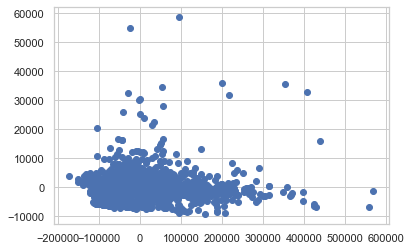

In [316]:
pca = PCA()
df_num_pca = pca.fit_transform(df_numerical_nooutlier)
plt.scatter(*df_num_pca[:, :2].T)

### One main clump with X axis being the most valuable in explanation, followed by Y axis with outliers.

## In Conclusion

### The data showed that newer, larger homes tend to sell for more and the less crime in a neighborhood made that location's realestate worth more. Most of the homes fro sale were single family homes and were likely not brand new since the outside exterior was rough on the majority of the houses. We were able to reduce the dimensionality of the dataset successfully.

### The Ames Housing Dataset is not just a collection of data points, but a window into the complex world of real estate. Its unique features, diverse insights, and potential for real-world application make it a treasure trove for data scientists, researchers, and anyone interested in understanding the intricate dance between houses, neighborhoods, and markets.